## "Scanner" Class - to read input from terminal

- Scanner object is used to read input from terminal
- How to communicate from keyboard to Scanner object? 
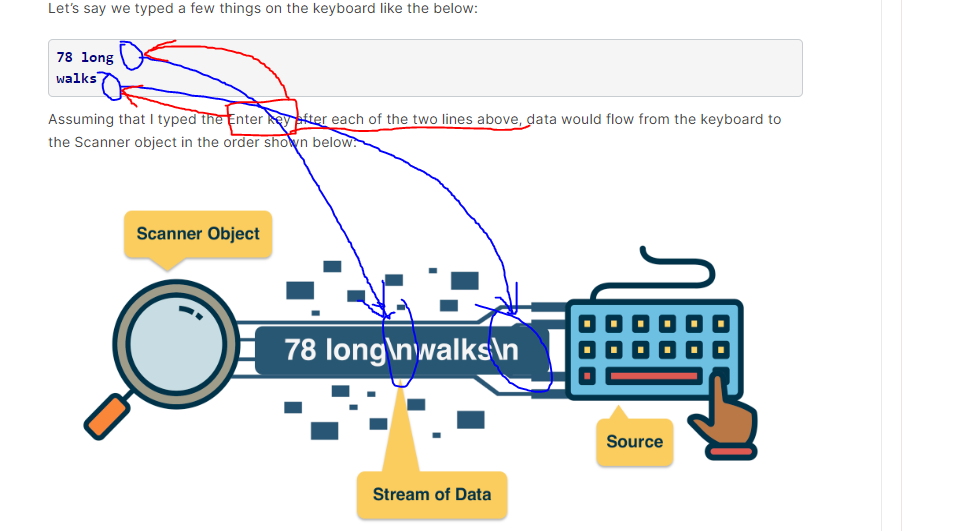

**Scanner Methods - "next"-related methods:**

(line 1 below)
- "Scanner" class is not built-in to Java, it needs to be imported as a Class. (first line in the code example below)
    - "java.util" is called a **packageName** which refer to java.util **package**, where many related Classes are stored under.
    - "Scanner" inside java.util.Scanner is called a **memberName** under that package
    - Together, the package and member name (e.g., java.util.Scanner) represent what’s known as the **fully-qualified name of a package member**
    - To import all members (classes) under one package, use * (e.g. import java.util.*)

(line 5,6 below)
- Scanner Object receives "live" stream of data from System.in: Any user input in terminal will update System.in, thus update the "input" object variable. It can be proved by switching the order of line 5 and 6 in example below, you will notice result is the same, because either way the input (and System.in) will be automatically updated after user has input in terminal.
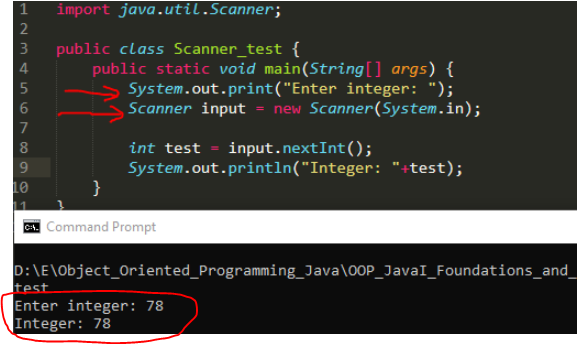
vs.
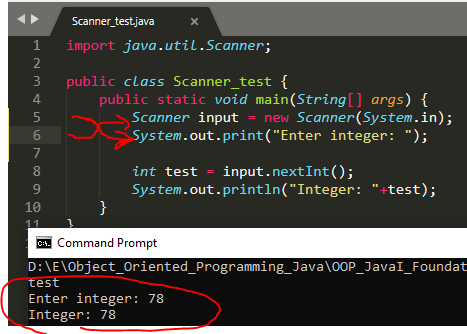

- Please note: print() method is used for user input rather than println(), because we want the user input to be in the same line as input prompt string "Enter a Fahrenheit value: " (println() method will jump to newline after printing)

(line 8 above)
- Scanner "next"-related methods will wait if there is no data (**Empty**) as method input.
    - For example, in the two examples above, after line 5 and line 6, the code will proceed to line 8 without waiting for user to enter anything in terminal
        - Reason: for system.out.print() method, it just printed a string on the terminal, it does not pause the code by any means.
        - Also remember, the data stream is "live", which will automatically update System.in and "Input" variable if user enters anything in terminal later on, so it doesn't matter even if code does not pause
    - After code proceed to line 8, it will run input.nextInt(), but due to all "next"-related methods' feature design, the method will actually "pause" the code here until there is some non-empty data stream as method's input before invoking method.
    - After user enter something in the terminal, the "Input" variable will have some live stream of data which is not empty, then method will be invoked and proceed when another condition also satisfies (see below bullet point).
    

(line 8 above)
- Scanner "next"-related methods need a signal to know when the System.in (or Input variable) is finished, e.g. typing 78 in terminal is not enough in examples above to start the invoking process of the "next"-related method, user needs to type "Enter" key (i.e. represented by "\n" in stream of data) in terminal after entering the input 78, to give Scanner object a signal to start invoking the "next"-related method

> Please note: \n (newline character, i.e. "Enter" key) is one of whitespace characters

> whitespace characters include: space, tab, and \n

(line 7 in Ex a. below + line 7,8 below in Ex b. below)
- All "next"-related methods (e.g. nextInt()) except nextLine() method, all whitespace characters (including "\n"(Enter key)) are the delimiters. And method will stop at extracting the input data stream when it hits the delimiter.
    - For example, in Ex a., the input is "78 82\n" (\n represents the "Enter" key user pressed in terminal), the whitespace " " after 78 is a delimiter for nextInt() method in line 7
        - So in line 7, after reading 78, the nextInt() will stop pulling input data from data stream, and cursor (for System.in) will stop right before the delimiter (i.e. whitespace).
        - In this case, after line 7 is finished, "test" variable will be int 78; while "input" variable will now be updated to " 82\n" 
            - please note: 78 is removed from "input" variable because System.in cursor moves to after 78 (This is how System.in cursor works, it moves while the Scanner Object pulls(reads) the input from stream of data)
            - And please note: whitespace " " is included in "input" variable because System.in cursor stops right before the " " after line 7 


- If you want to read the next input data stream after delimiter, you need to re-invoke the method
    - For example, in Ex b., since input has a whitespace to split the input to two tokens (78 and 82) for nextInt() method, I need to use input.nextInt() twice (in line 7 and line 8) in order to capture both.


- All "next"-related methods except nextLine() method, will ignore any leading whitespace characters (including leading "\n"(Enter key)) before any token.
    - For example, in Ex b., the input is "78 82\n". 
        - As stated above, after line 7 is finished, "test" variable will be int 78; while "input" variable will now be updated to " 82\n"
        - And in line 8, leading whitespace " " before 82 will be ignored by the second nextInt() method, then 82 will be pulled from stream of data to "Input" variable to "test1", and System.in cursor will stop before "\n" and code will move to line 9
        - After line 8 is finished, "test1" variable will be int 82, and the updated "input" variable will now be updated to "\n"

    - Another example, in Ex c., the input is "78\n" when user first enter the input in terminal.
        - As stated above, after line 7 is finished, "test" variable will be int 78; while "input" variable will now be updated to "\n"
        - Because nextInt() method will ignore any leading "\n" character as stated above, nextInt() will pull nothing to feed to the method at the time (i.e. **Empty** for nextInt() method input) --> based on one of the bullet point above "Scanner "next"-related methods will wait if there is no data (**Empty**) as method input." --> the nextInt() method will pause the code until user provide any non-empty stream of data
            - Please note: in this case, System.in's cursor will stop BEFORE "\n" as stated above, so "input" variable is still "\n"
        - Then you will notice in the terminal, user entered another twice "\n" (Enter key), but still the same, \n will be ignored by the nextInt() method
            - Please note: in this case, System.in's cursor will also stop BEFORE the very first "\n" as stated above, so "input" variable is now updated to "\n\n\n"
        - Finally in the second last line of terminal, user entered "82\n", so the updated "input" variable is now as "\n\n\n82\n", then nextInt() method will read 82 as method's input, since it is **NOT Empty**, therefore the nextInt() method will be invoked and line 8 will complete.
            - As a result, "test1" variable will be int 82, 
            - Cursor of System.in will move after 82, and stops before "\n" after 82
            - The updated "input" variable will now be updated to whatever is after the cursor, which is "\n" **(Please note: "\n\n\n" before 82 is no longer part of "input" variable because cursor already moved past them)**
    

Ex a:
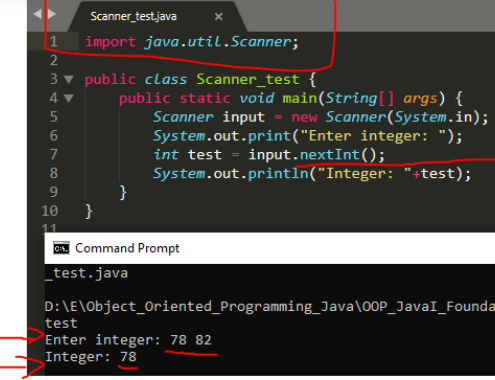

Ex b:
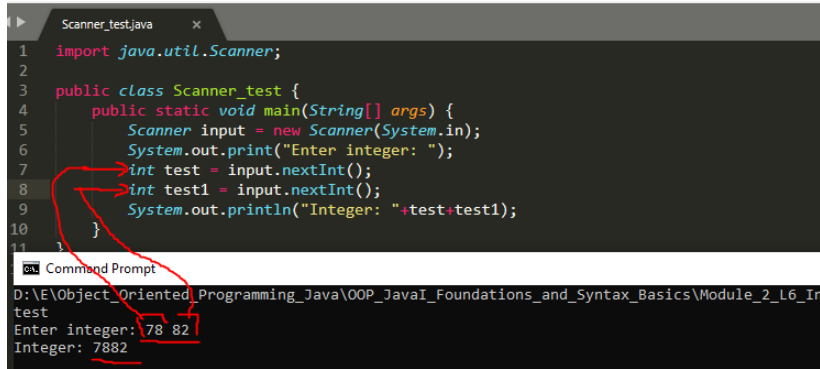

Ex c:
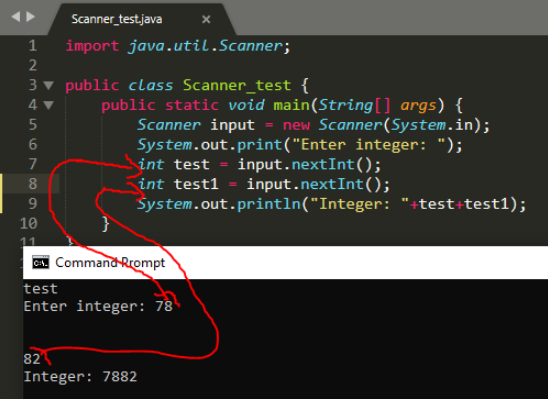

nextLine() method:
- nextLine() method will include all other whitespace characters (except "\n") in the returned String until it hits "\n"(Enter). It won't include "\n" in the returned string.
    - This means any leading whitespace (except "\n") will be in the returned string, e.g. "      sdfa asdf"
- ***First difference*** compared to other "next"-related methods is that: **The System.in cursor is now pointing to AFTER "\n" so you can understand it as "\n" was removed from stream of data when nextLine() method finishes.** (Other "next"-related methods: cursor will stop BEFORE the "\n")
- ***Second difference*** compared to other "next"-related methods is that: **Although output will ignore all "\n" characters for nextLine() method, the "\n" character is pulled into the method's input (This explains why cursor is moved to AFTER "\n" above). In this case, if a user input only includes "\n" character, it won't treat it as "EMPTY" method input as other "next"-related methods. --> Therefore, the method WILL be invoked and input.nextLine() line of code will be executed and completed!!! 

- The two features(difference) above can be used to remove "\n" from "input" variable before calling the second nextLine() method
    - For example below: after line 7 is finished, "test" variable will be int 78; while "input" variable will now be updated to "\n"
    - Then when line 8 is running, nextLine() will be invoked and completed taking "\n" as input due to the reason above.
        - nextLine() will first start
        - And then immediately finish because it hits "\n"
        - the cursor will be pointed after that ONE "\n"
    - After line 8 is finished, "input" variable will now be updated to **Empty** based on process above.
        - Please note: based on process above, line 8 can ONLY clean up ONE "\n" character for the "input" variable
    - In line 9, user updated "input" variable to be "asdfa asdflk\n"
    - In line 10, Because there is no longer "\n" at the beginning of the "input", the nextLine() method won't start and immediately finish. It will read all inputs until hits another "\n" which is the last character in the "input" variable
    - After line 10 is finished, "test1" will be "asdfa asdflk" (note: "\n" will not be in the returned String as stated above); "input" variable will now be updated to **Empty** because the cursor moved past "\n" after nextLine() method.

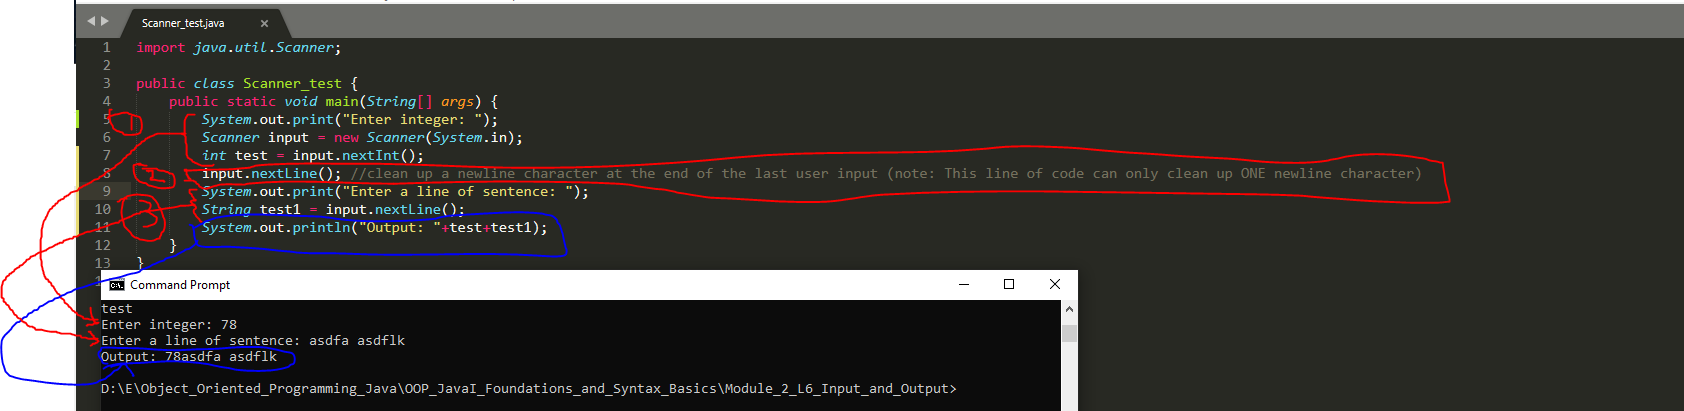

- Scanner Errors:
    - user input must match the data type of scanner's next methods
        - E.g. in the example below, if user enters a string object, then nextInt() method will throw a Runtime error
        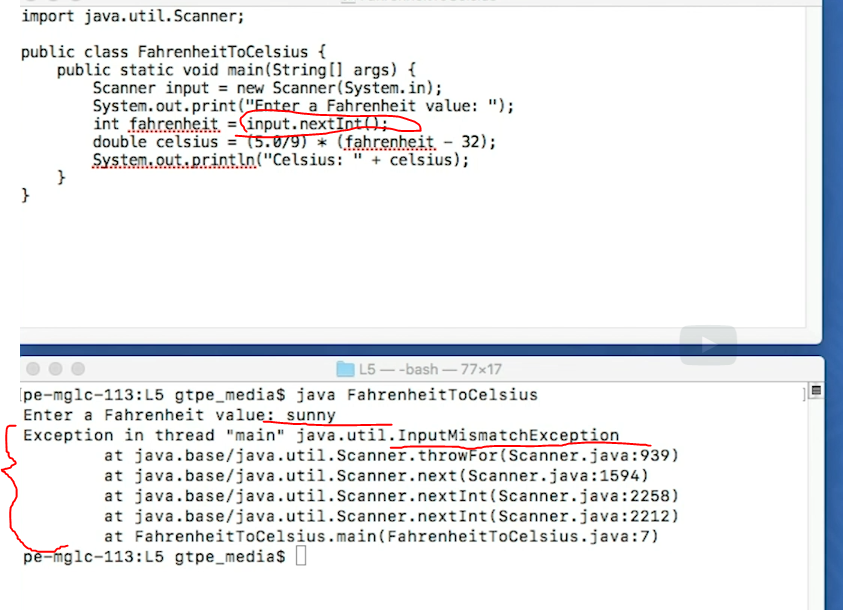

## Formatting for Output

**Formatting with printf**
- printf uses format specifier to specify the format of non-fixed parts (variables) in the print input
- printf does not automatically move cursor to new line, so you need to use \n if you want the cursor moves to new line in the terminal after printf
- For example:
    - %s and %f are the **format specifiers** holding the place for "day" and "celsius" variables(non-fixed parts), respectively.
    - There is not any format being applied for example below yet, "s" and "f" only specified the **type** of data that will be inserted and possibly formatted.
    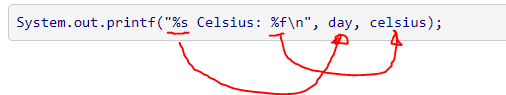
- To specify the format using format specifier, use this template:
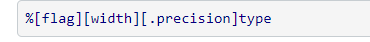
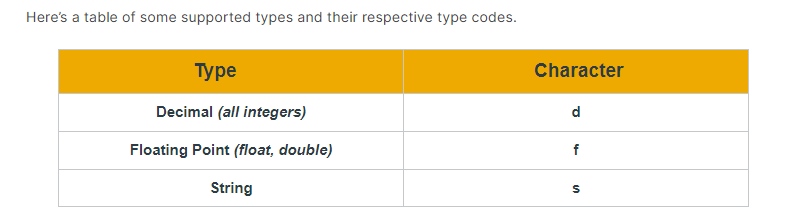
    - Example 1, use ".1" for "precision" will make the output "celsius" as 1 decimal place (Please note: the output will automatically round to its nearest number, not truncated. E.g. 25.5556 -> 25.6 instead of 25.5)
    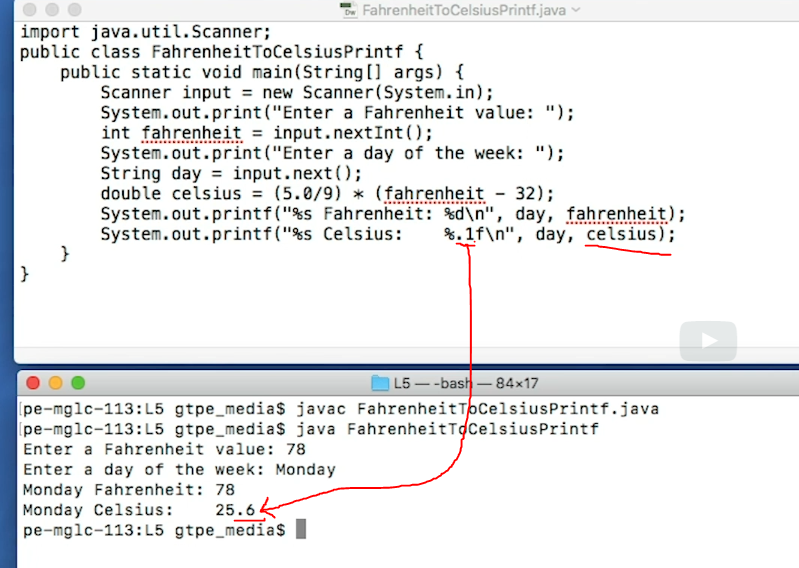
    - Example 2, in example below
        - use "20" as "width" will pad the "test1" string to 20 character length by adding whitespace **before** the string
        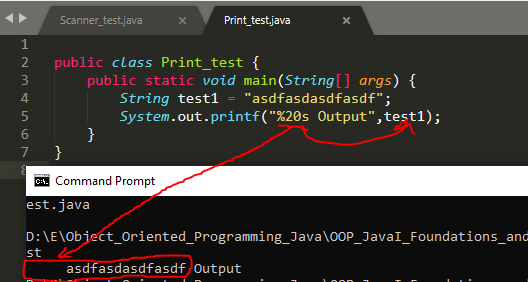
        - Use "-20" will pad the "test1" string to 20 character length by adding whitespace **after** the string
        - But when width is smaller than the length of the string, it will be ignored, the original string will be printed.
        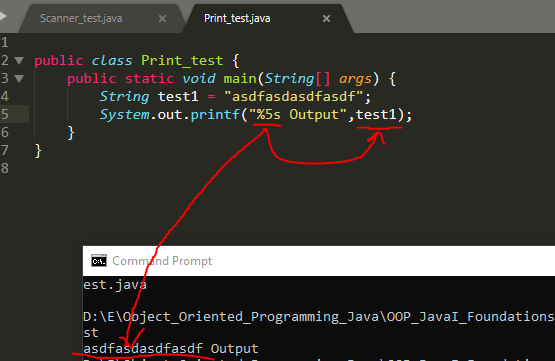
    - Example 3, using "," as "flag" will add thousands-separators
    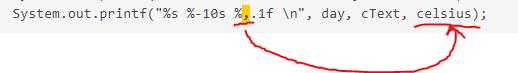
    

## String Format
**String.format**
- It works just like printf except it doesn’t actually print the final formatted String on the terminal. Instead, the method returns the formatted String value, which you could then store in a variable for example.  Here’s an example using the same parameters that you saw earlier for printf
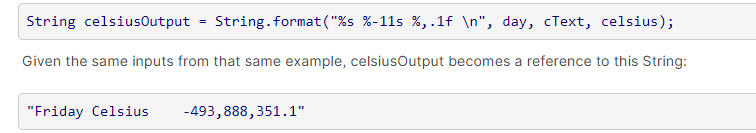

## Number Format

**java.text.NumberFormat**

- The Java API includes the NumberFormat class, it's particularly useful for currency and percentage formatting.
- For currency format, use NumberFormat.getCurrencyInstance() to instantiate an object designed for currency format. (as example below)
    - Please note: it's not always the case that we'll be using "new" operator to instantiate objects. Some classes (like above) have methods that return new instances of themselves where the instances are customized in certain ways.
- After the object is created, object.format(xxx) method is called, where xxx is automatically formatted to the currency format
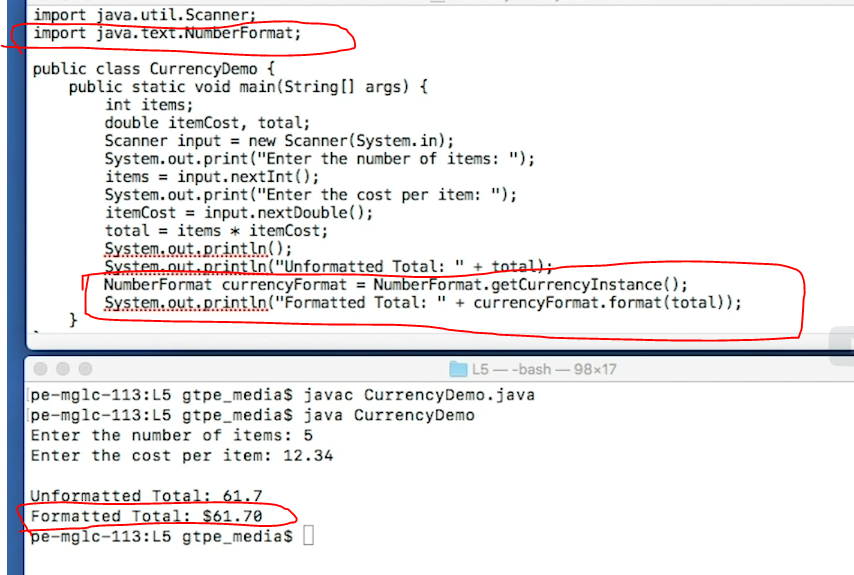


- If nothing is specified when instantiate the object, the Class will automatically detect your location (e.g. US, Europe, ...) and use corresponding currency format, e.g. Dollar, Euro, ... 
    - But you can also specify location when instantiate the object by using a class in the java.util package called Locale
    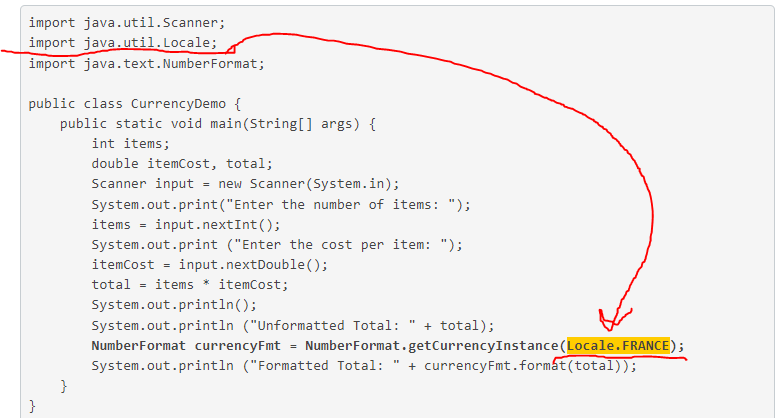

## Decimal Format
**java.text.DecimalFormat**
- Another useful number formatting class in the java.text package is DecimalFormat.
- Example 1:
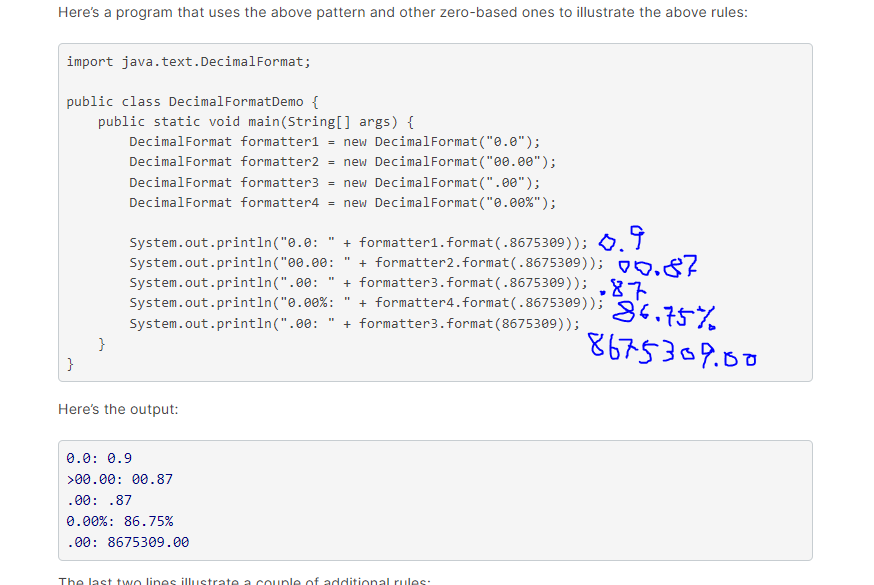

- Example 2:
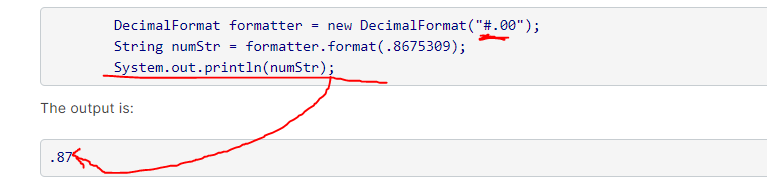

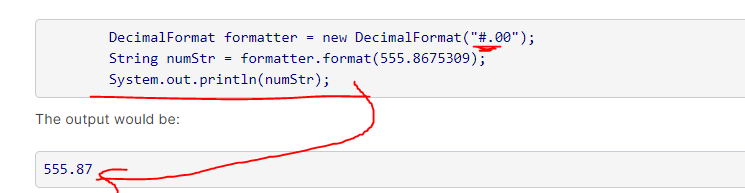


- From above examples, it shows couple of Rules related to "xxx" in DecimalFormat("xxx"):
    - A digit 0 in some pattern’s position **guarantees** that there will be a digit (not necessarily 0) in that same position for any formatted result.
    - If the number being formatted has an actual digit in the same position of some 0 digit in the pattern, then that number’s digit will be shown in that position in the formatted result.
    - If the number being formatted does not have a digit in the same position of some 0 digit in a pattern, the formatted result will fill that position with an actual 0 digit.  
    - If there are more decimal places in the number being formatted than found in the pattern, the formatted result will round that number to a value with the same number of decimal places as specified in the pattern.
    - If a percent sign is found at the end of a pattern, the format method will return a percentage value that represents the input
    - The number of zeros to the left of a decimal point in a pattern do not constrain the number of digits that the format method will use from its input value.
    - There are other pattern symbols that you can use besides 0 and %.  For example, the # (pound/hash) symbol allow you to write patterns with **optional** digits